# UBC CTLT Learning Analytics Hackathon

## Introduction to pandas and matplotlib

### March 10, 2018

Patrick Walls // [pwalls@math.ubc.ca](mailto:pwalls@math.ubc.ca) // [www.math.ubc.ca/~pwalls](https://www.math.ubc.ca/~pwalls)

## Import the data

We'll be using the Open University Learning Analytics dataset. Follow these steps:

1. Download the data from [https://analyse.kmi.open.ac.uk/open_dataset](https://analyse.kmi.open.ac.uk/open_dataset)
2. Unzip the data
3. Download the compiled dataset `all_enrolments.csv` from [http://bit.ly/HackUBCsmallData](http://bit.ly/HackUBCsmallData) (Thanks [Craig](https://github.com/craigdsthompson) and [David](https://github.com/davidklaing)!)
4. Open a Jupyter notebook (from the same directory containing the dataset directory `anonymisedData`)

The directory on my machine containing this notebook file (called `ctlt-hackathon.ipynb`) contains these files:

```
all_enrolments.csv
ctlt-hackathon.ipynb
anonymisedData/
    assessments.csv
    courses.csv
    studentAssessment.csv
    studentInfo.csv
    studentRegistration.csv
    studentVle.csv
    vle.csv
```

## Import packages

The essential [Python](http://python.org/) packages for data analysis are [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/). Keep browser tabs open to their documentation. We're going to need them! (As well as the [Jupyter](http://jupyter.org/) documentation.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Student Activity

The 7 datasets contain information about courses, assessments, students, student registration, VLE (virtual learning environment) and student interaction with the VLE. The first question we'd like to ask is: how often are students interacting with the VLE?

Let's import the file `studentVle.csv`:

In [2]:
studentVle = pd.read_csv('anonymisedData/studentVle.csv')

Take a look at data:

In [3]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
code_module          object
code_presentation    object
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Wow! There are 10.65 million rows in this dataset. Each row describes how many times a particular student clicked an item in the VLE on a particular day. Let's look at the first 5 rows:

In [4]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


Let's count the total number of clicks per student and display the result as a histogram.

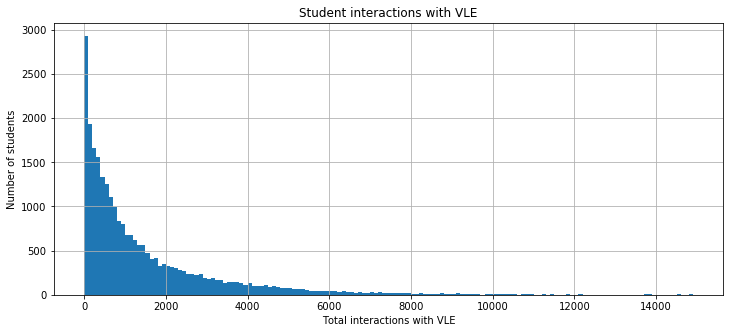

In [5]:
plt.figure(figsize=(12,5))
studentVle.groupby('id_student')['sum_click'].sum().hist(bins=range(0,15000,100))
plt.xlabel('Total interactions with VLE')
plt.ylabel('Number of students')
plt.title('Student interactions with VLE');

## Student profile

How many students are there? Let's import the file `studentInfo.csv` and count the number of students.

In [6]:
studentInfo = pd.read_csv('anonymisedData/studentInfo.csv')

In [7]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


There are 32593 student enrolments but some students may have enrolled in more than one course. Let's count the number of unique student IDs.

In [8]:
studentInfo['id_student'].nunique()

28785

Let's see the distrubution of students by gender and age as a bar plot:

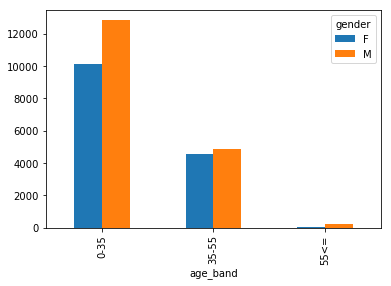

In [9]:
studentInfo[['gender','age_band']].groupby(['age_band','gender']).size().unstack().plot(kind='bar');

## Course enrolment

How many students enrolled in each offering of each course? Let's import the file `studentRegistration.csv` and count the enrolments per course and display the result as a heatmap.

In [10]:
studentRegistration = pd.read_csv('anonymisedData/studentRegistration.csv')

In [11]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32548 non-null float64
date_unregistration    10072 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


We want to group the rows by course (`code_module`) and then by offering (`code_presentation`) and then count the unique student IDs. The result is:

In [12]:
studentRegistration.groupby(['code_module','code_presentation'])['id_student'].nunique().head()

code_module  code_presentation
AAA          2013J                 383
             2014J                 365
BBB          2013B                1767
             2013J                2237
             2014B                1613
Name: id_student, dtype: int64

Now we unstack (the index has 2 columns and so we move the inside index to a column index) and fill the empty cells with 0.

In [13]:
registration_counts = studentRegistration.groupby(['code_module','code_presentation'])['id_student'].nunique().unstack().fillna(0)

Let's take a look!

In [14]:
registration_counts

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,0.0,383.0,0.0,365.0
BBB,1767.0,2237.0,1613.0,2292.0
CCC,0.0,0.0,1936.0,2498.0
DDD,1303.0,1938.0,1228.0,1803.0
EEE,0.0,1052.0,694.0,1188.0
FFF,1614.0,2283.0,1500.0,2365.0
GGG,0.0,952.0,833.0,749.0


Let's display the result as a heatmap using [seaborn](http://seaborn.pydata.org/). Seaborn is a Python package built on top of matplotlib. It's basically matplotlib with better styles. (Recall, we imported `seaborn` as `sns` at the top of the notebook.)

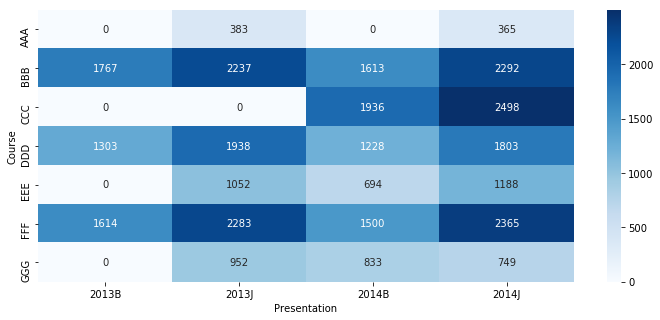

In [15]:
plt.figure(figsize=(12,5))
sns.heatmap(registration_counts,cmap='Blues',annot=True,fmt='.0f');
# or use the following code if you don't have seaborn installed
# plt.imshow(registration_counts)
plt.xlabel('Presentation')
plt.ylabel('Course');

## Student assessment, total engagement, days active and items accessed

Let's import the file `all_enrollemnts.csv`.

In [16]:
all_enrolments = pd.read_csv('all_enrolments.csv')

In [17]:
all_enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 20 columns):
code_module                        32593 non-null object
code_presentation                  32593 non-null object
id_student                         32593 non-null int64
date_registration                  32548 non-null float64
date_unregistration                10072 non-null float64
gender                             32593 non-null object
region                             32593 non-null object
highest_education                  32593 non-null object
imd_band                           31482 non-null object
age_band                           32593 non-null object
num_of_prev_attempts               32593 non-null int64
studied_credits                    32593 non-null int64
disability                         32593 non-null object
final_result                       32593 non-null object
total_activity                     29228 non-null float64
days_active                        2

Let's make a scatter plot displaying 4 dimensions:

* x axis: student engagement (total clicks)
* y axis: final assessment score
* color: days active
* dot size: distinct items accessed

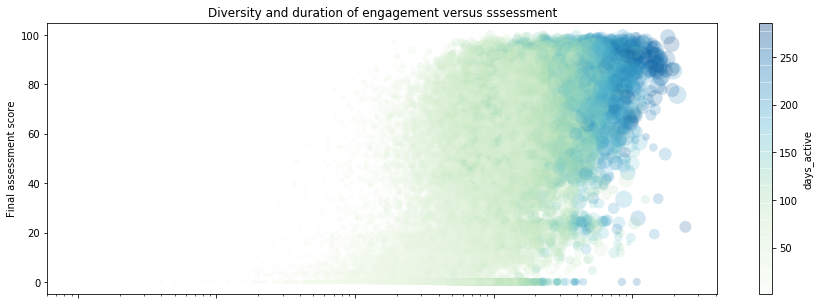

In [18]:
all_enrolments['distinct_content_items_accessed']
all_enrolments.plot(kind='scatter',x='total_activity',y='final_assessment_score',
                    c='days_active',s=all_enrolments['distinct_content_items_accessed'],
                    alpha=0.2,lw=0,logx=True,cmap='GnBu',figsize=(15,5))
plt.xlabel('Total clicks')
plt.ylabel('Final assessment score')
plt.title('Diversity and duration of engagement versus sssessment');

Note: the x label is lost when we plot with color. This is a bug in pandas that hasn't been resolved.

## Clicks on course content

Let's look at the course with the most enrolments, `CCC` offered in `2014J`, and see all the engagements over the term. We need to filter the DataFrame `studentVle` (imported above) by course `CCC` and then presentation `2014J`.

In [19]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
code_module          object
code_presentation    object
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [20]:
CCC = studentVle[studentVle['code_module'] == 'CCC']

In [21]:
CCC_2014J = CCC[CCC['code_presentation'] == '2014J']

Now we group by each item on the VLE and then the date and then sum the clicks.

In [22]:
clicks = CCC_2014J.groupby(['id_site','date'])['sum_click'].sum().unstack().fillna(0)

There is large variation in the number of clicks and so we apply `log` to reduce the larger values.

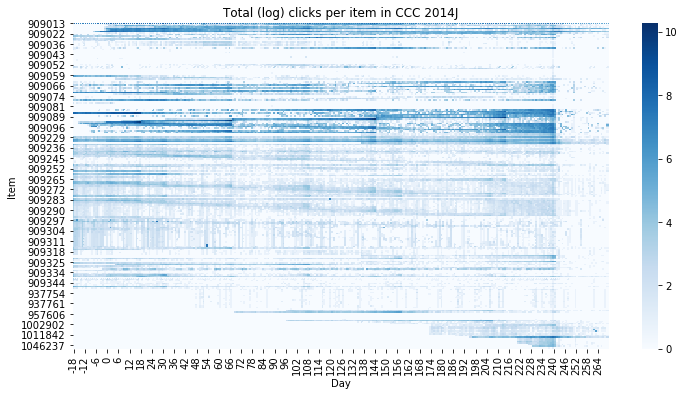

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(np.log(1+clicks),cmap='Blues')
plt.xlabel('Day')
plt.ylabel('Item')
plt.title('Total (log) clicks per item in CCC 2014J')

## Final assessment score distribution per course

Finally, let's look at the final assessment score per course offering.

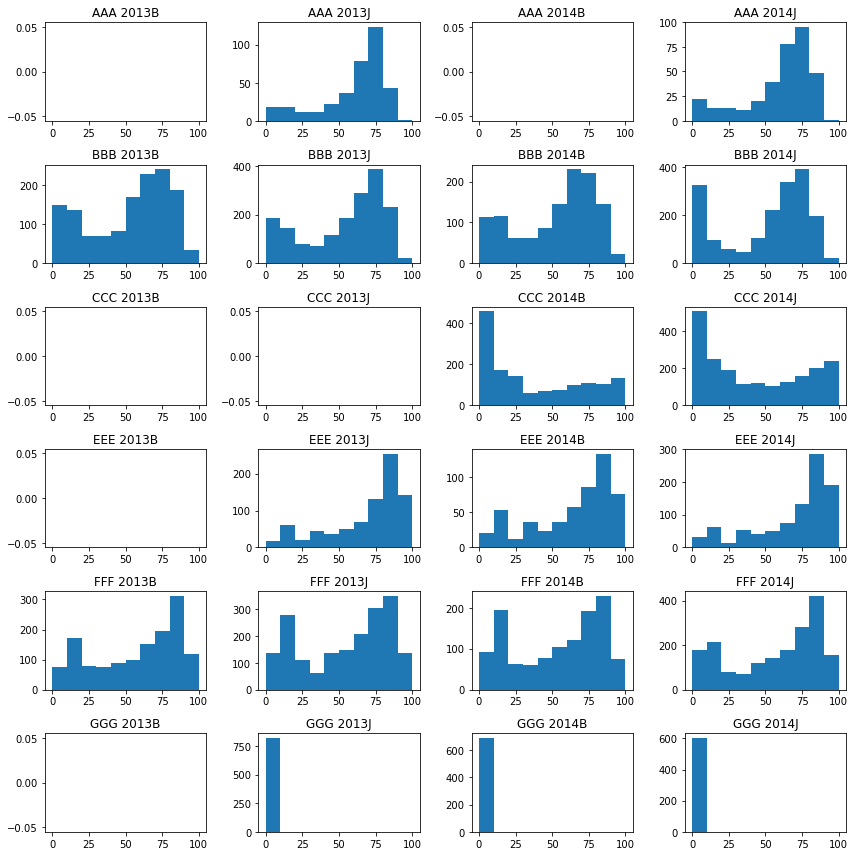

In [24]:
courses = ['AAA','BBB','CCC','EEE','FFF','GGG']
presentations = ['2013B','2013J','2014B','2014J']
num_courses = len(courses)
num_presentations = len(presentations)
plt.figure(figsize=(12,12))
plt.subplot(num_courses,num_presentations,1)
for i, course in enumerate(courses):
    for j, presentation in enumerate(presentations):
        plt.subplot(num_courses,num_presentations,num_presentations*i + j + 1)
        course_df = all_enrolments[(all_enrolments['code_module'] == course) & (all_enrolments['code_presentation'] == presentation)]
        grades = course_df['final_assessment_score'].fillna(-1)
        plt.hist(grades,bins=range(0,101,10))
        plt.title(course + ' ' + presentation)
plt.tight_layout()

What's up with GGG?